# TOC

__Chapter 5 - Supervised learning using PyTorch__

1. [Import](#Import)
1. [Recipe 5-1 : Data preparation for the supervised model](#Recipe-5-1-:-Data-preparation-for-the-supervised-model)
1. [Recipe 5-2 : Forward and backward propagation](#Recipe-5-2-:-Forward-and-backward-propagation)
1. [Recipe 5-3 : Optimization and gradient computation](#Recipe-5-3-:-Optimization-and-gradient-computation)

# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.options.display.float_format = "{:,.6f}".format

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# custom extensions and settings
sys.path.append("/main") if "/main" not in sys.path else None
import mlmachine as mlm
import quickplot as qp

# magic functions
%matplotlib inline
sns.set_style("whitegrid")

# Recipe 5-1 : Data preparation for the supervised model

__Problem__: How do we perform data preparation for creating a supervised learning model using PyTorch

__Solution__: A combination of pandas and built-in PyTorch tools

<a id = 'Recipe-5-1-:-Data-preparation-for-the-supervised-model'></a>

In [44]:
# load and inspect data
df = pd.read_csv("data/mtcars.csv")
df[:5]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
1,Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
2,Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
3,Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
4,Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2


In [45]:
# load and inspect data
torch.manual_seed(1234)

x = torch.unsqueeze(torch.from_numpy(np.array(df.qsec)), dim=1)
y = torch.unsqueeze(torch.from_numpy(np.array(df.mpg)), dim=1)

print(x[:5])
print(y[:5])

tensor([[16.4600],
        [17.0200],
        [18.6100],
        [19.4400],
        [17.0200]], dtype=torch.float64)
tensor([[21.0000],
        [21.0000],
        [22.8000],
        [21.4000],
        [18.7000]], dtype=torch.float64)


# Recipe 5-2 : Forward and backward propagation

__Problem__: How do we build a neural network torch class function?

__Solution__: We will create a small neural network that has an input layer, one hidden layer and an output layer

<a id = 'Recipe-5-2-:-Forward-and-backward-propagation'></a>

In [46]:
# create Net class
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))  # activation function for hidden layer
        x = self.predict(x)  # linear output
        return x

In [47]:
# n_feature shows the number of neurons in the input layer. we have one input variable, qsec, so n_feature = 1. we will arbitrarily
# choose 20 as the number of hidden neurons (n_hidden = 20). lastly, n_output = 1
net = Net(n_feature=1, n_hidden=20, n_output=1)
net.double()
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


In [48]:
# we choose MSELoss as the loss funciton but there several different options, including SGD, Adadelta, Adagrad, Adam, ASGD, RMSprop, SparseAdam
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

print(optimizer)
print(loss_func)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.2
    momentum: 0
    nesterov: False
    weight_decay: 0
)
MSELoss()


# Recipe 5-3 : Optimization and gradient computation

__Problem__: How do we build a basic supervised neural network training model using PyTorch

__Solution__: There are six steps - prepare the training data, initialize weights, create the network, select a loss function, select a learning rate and optimize the loss function with respect to the model parameters.

<a id = 'Recipe-5-3-:-Optimization-and-gradient-computation'></a>

<IPython.core.display.Javascript object>


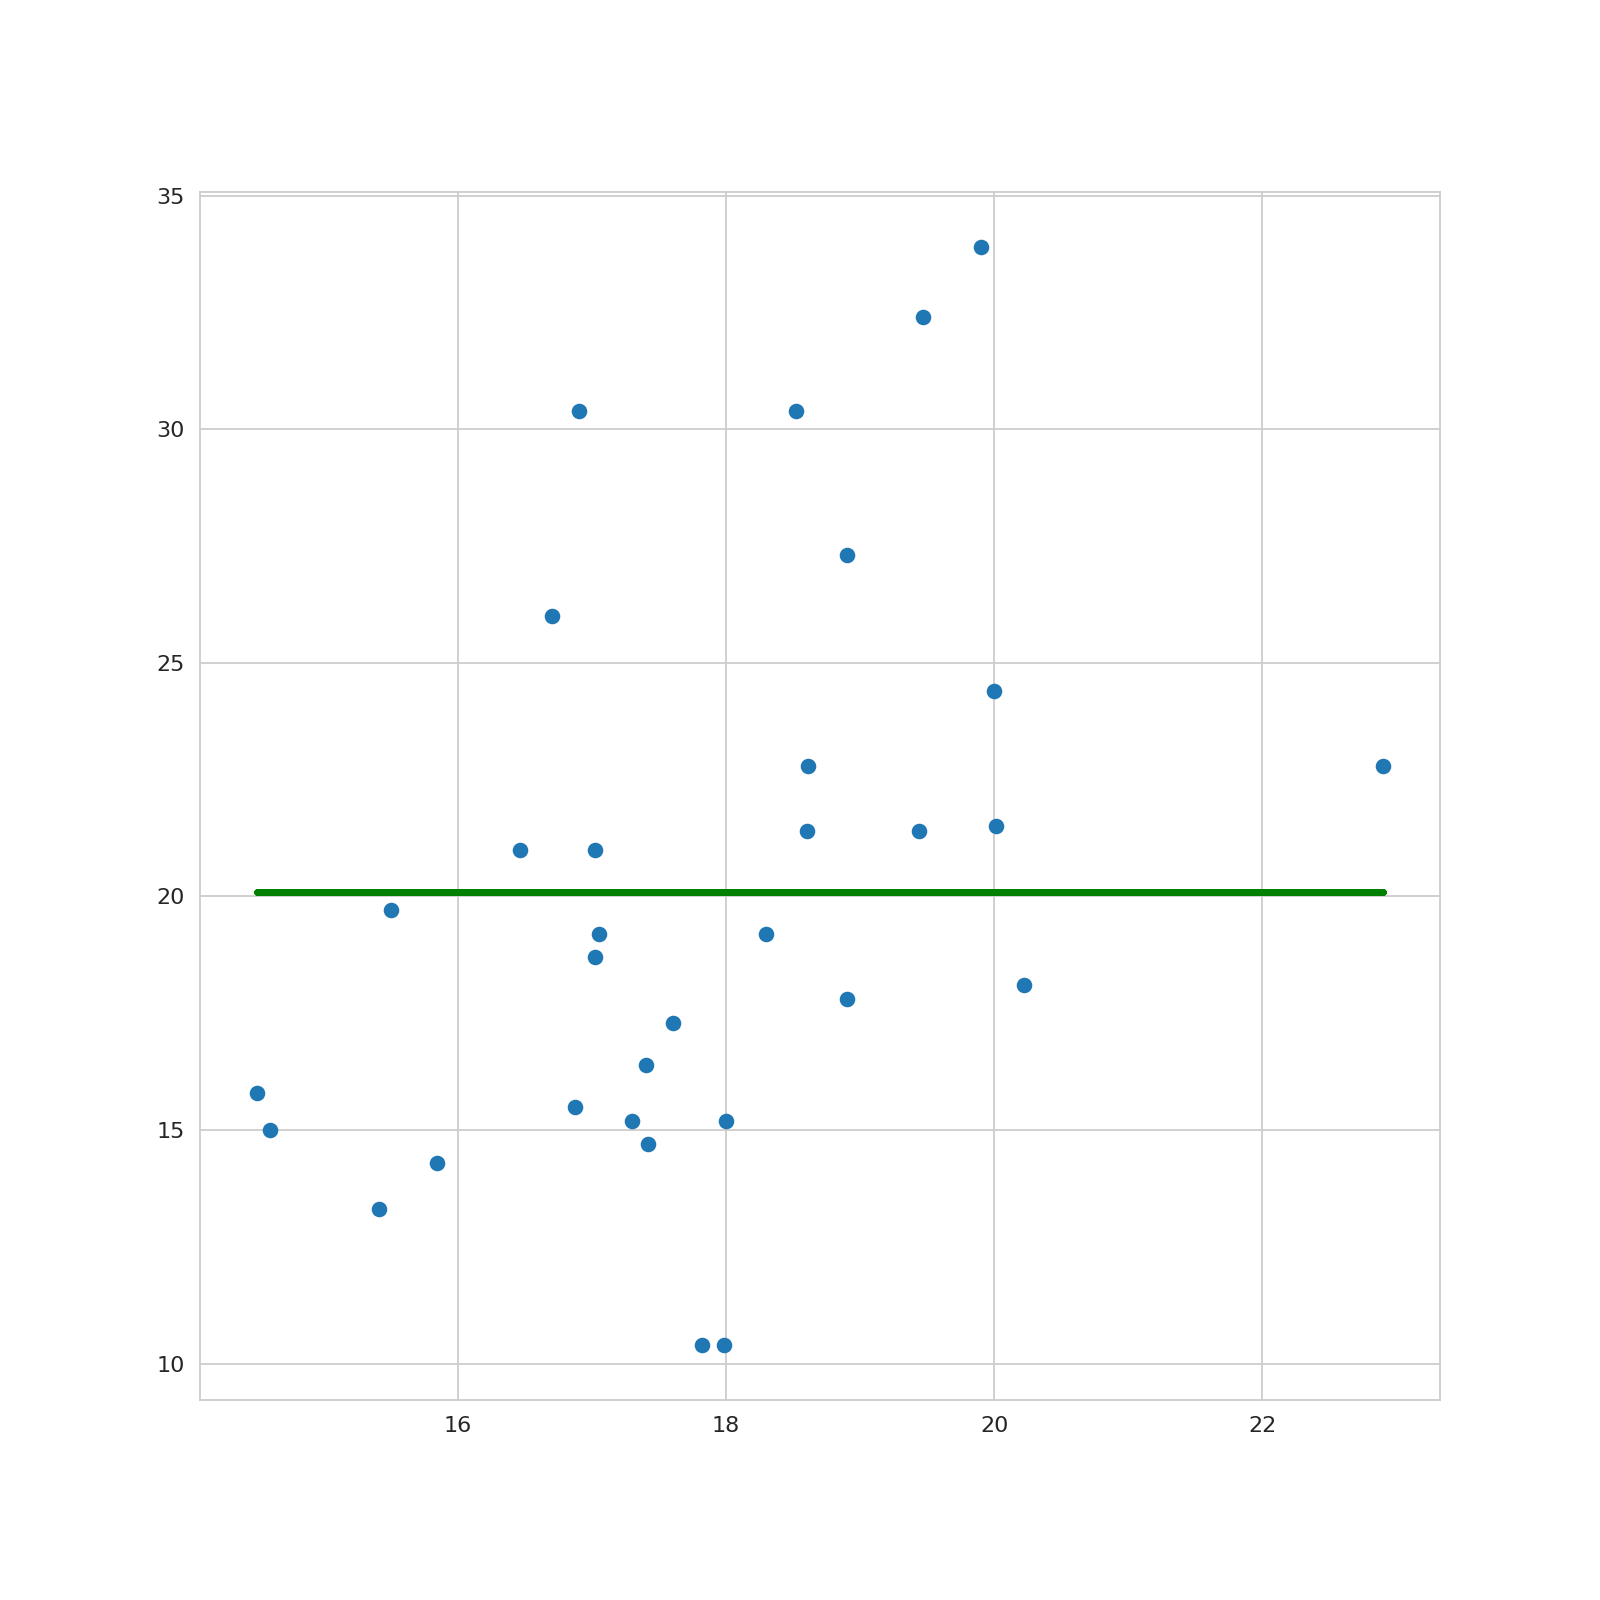

In [49]:
# create interactive plot illustrating fit
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for t in range(100):
    prediction = net(x)  # create predictions based on x
    loss = loss_func(prediction, y)  # neural network output and target
    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 5 == 0:
        ax.clear()
        plt.scatter(x.data.numpy(), y.data.numpy())
        ax.plot(x.data.numpy(), prediction.data.numpy(), "g-", lw=3)
        fig.canvas.draw()
        time.sleep(1.0)
plt.ioff()